# Tech Challenge Fase 1

# Aluno
Klauber Lage - RM358972

# Tarefas
## 1 - Exploração de dados:

- (A) Carregue a base de dados e explore suas características. ✔️
- (B) Analise estatísticas descritivas e visualize distribuições relevantes.

## 2 - Pré-processamento de dados:
- (A) Realize   a   limpeza   dos   dados,   tratando   valores   ausentes (se necessário).
- (B) Converta   variáveis   categóricas   em   formatos   adequados   para modelagem.
- (C) Divida o conjunto de dados em conjuntos de treinamento e teste [1].
- (D) Crie  um modelo  preditivo  de  regressão utilizando uma técnica à  sua escolha (por exemplo, Regressão Linear, Árvores de Decisão etc) [1].
   - (1) Regressão Linear [2]
   - (2) Árvores de Decisão [2]

[1] Os itens C e D foram trocados de ordem para que o fluxo siga da meneira correta no código.
[2] Serão criados os dois modelos.

## 3 - Treinamento e avaliação do modelo:
- (A) Treine o modelo com o conjunto de treinamento.

### 4 - Validação estatística:
- (A) Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

## O que avaliaremos:
Apresente  resultados  visuais,  como  gráficos  de  previsões  vs.  valores reais.

Elabore  um  relatório  que  inclua  uma  análise  dos  resultados,  insights obtidos e validação estatística.

## Observações:
Esperamos que  o  modelo  seja  capaz  de  fazer  previsões  confiáveis  dos custos médicos individuais com base nas características fornecidas.

### Referência:
[Documento PDF do Desafio](POSTECH-TechChallenge-IADT-Fase1.pdf)

---



# 0 - Instalação de dependências

In [113]:
! pip install pandas pyarrow matplotlib seaborn

# 1 - Exploração de dados:

## (A) Carregue a base de dados e explore suas características

In [114]:
# Importando o pandas 
# pip install pandas
import pandas as pd

# Usando o pandas para ler o conteúdo do arquivo CSV
dados = pd.read_csv('data/dados.csv')

# Mostrando os primeiros itens da lista
dados.head(10)

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,não,sudeste,1725.55230
2,28,masculino,33.000,3,não,sudeste,4449.46200
3,33,masculino,22.705,0,não,noroeste,21984.47061
4,32,masculino,28.880,0,não,noroeste,3866.85520
5,31,feminino,25.740,0,não,sudeste,3756.62160
6,46,feminino,33.440,1,não,sudeste,8240.58960
7,37,feminino,27.740,3,não,noroeste,7281.50560
8,37,masculino,29.830,2,não,nordeste,6406.41070
9,60,feminino,25.840,0,não,noroeste,28923.13692


In [115]:
# Descrevendo os dados
# Retornando os dados do DataFrame agrupada pelo Gênero, cada tópico significa:
'''
count: observações no grupo
mean: média das observações
std: desvio padrão
min: o valor mínimo
25%: 25% das observações estão abaixo do valor informado
50%: mediana
75%: 75% das observações estão abaixo do valor informado
max: o valor máximo é o informado
'''
# dados.groupby('gênero').describe()
dados.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [146]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   gênero    1338 non-null   int64  
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   int64  
 5   região    1338 non-null   int64  
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [117]:
# Retornando os dados do DataFrame na sequência (X, Y), que significa:
''' 
X linhas: Há X registros ou observações no conjunto de dados.
Y colunas: Cada registro ou observação tem Y atributos ou características.
'''
dados.shape

(1338, 7)

## (B) Analise estatísticas descritivas e visualize distribuições relevantes.

Text(0.5, 1.0, 'Relação entre idade e engargos')

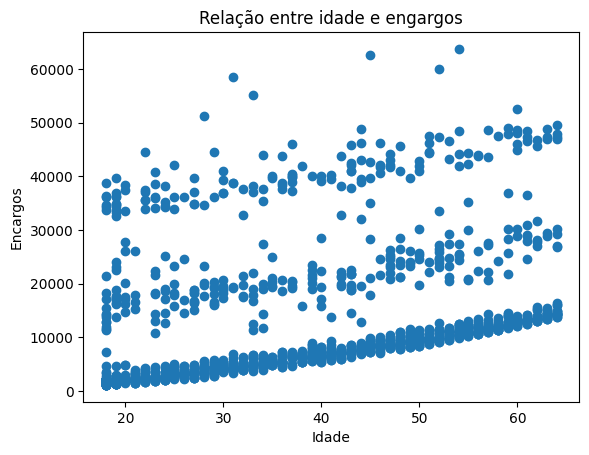

In [118]:
import matplotlib.pyplot as plt

plt.scatter(dados['idade'], dados['encargos'])
plt.xlabel("Idade")
plt.ylabel("Encargos")
plt.title("Relação entre idade e engargos")


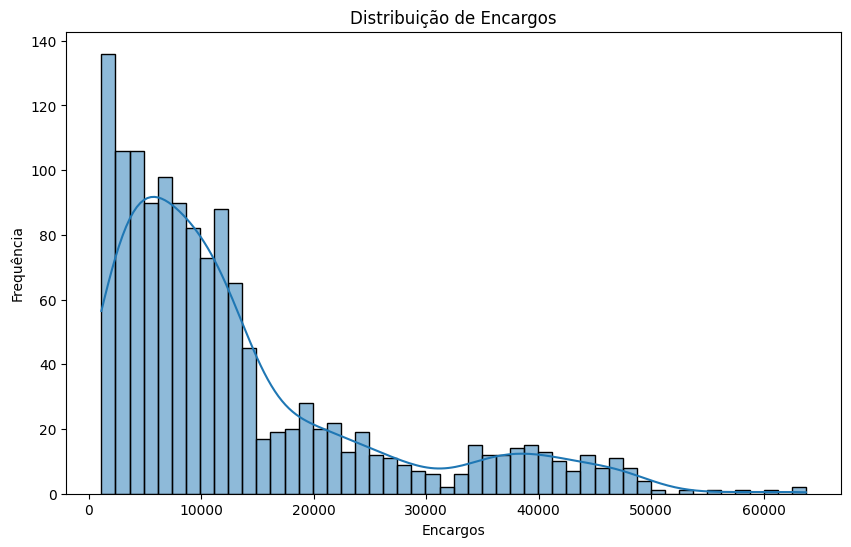

In [119]:
# Histograma para a coluna encargos
import seaborn as sb
plt.figure(figsize=(10, 6))
sb.histplot(dados['encargos'], bins=50, kde=True)
plt.title('Distribuição de Encargos')
plt.xlabel('Encargos')
plt.ylabel('Frequência')
plt.show()

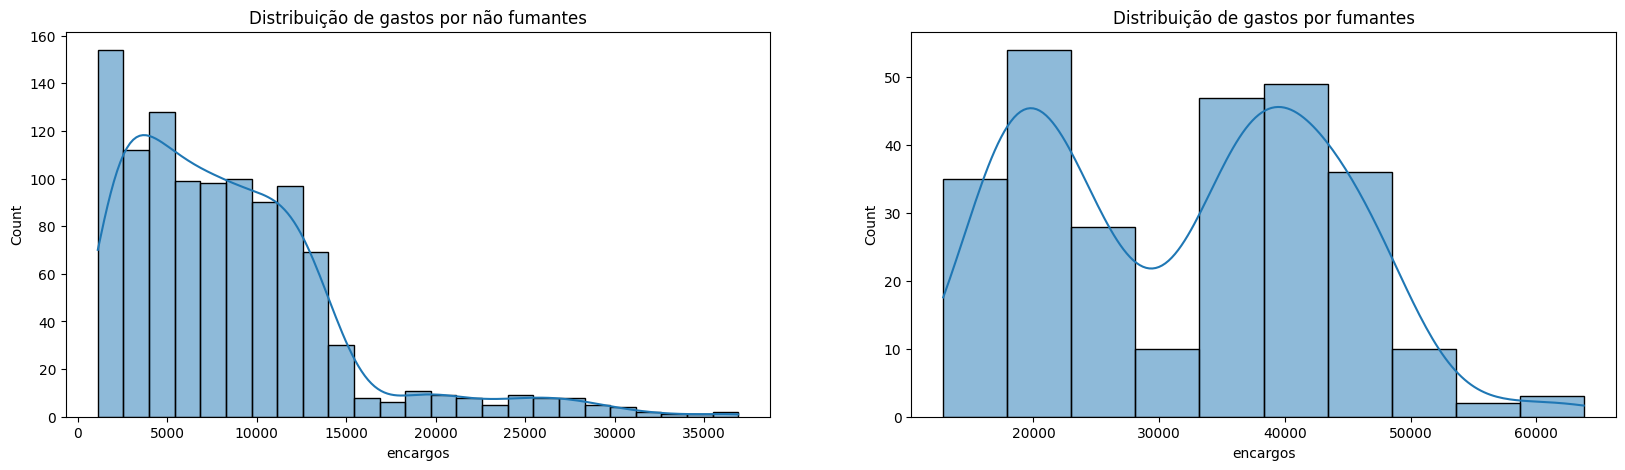

In [149]:
# Distribuição de Gastos por Fumantes e Não Fumantes
fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(121)
sb.histplot(dados[dados.fumante == 0]['encargos'], kde=True)
ax.set_title('Distribuição de gastos por não fumantes')


ax = fig.add_subplot(122)
sb.histplot(dados[dados.fumante == 1]["encargos"], kde=True)
ax.set_title('Distribuição de gastos por fumantes')


plt.show()

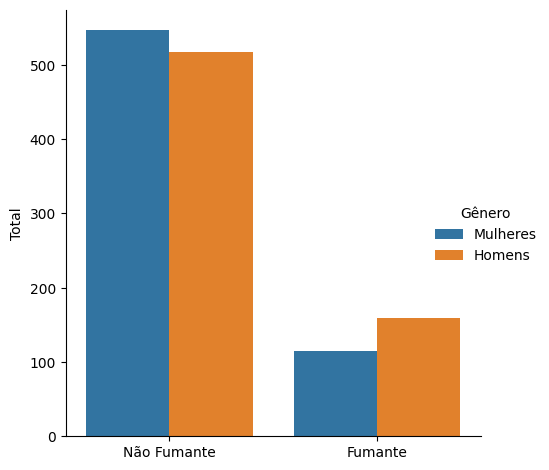

In [135]:
# Fumantes e não fumantes por gênero
plot = sb.catplot(x="fumante", kind="count", hue='gênero', data=dados, legend_out=True)

plot.set_axis_labels("", "Total").set_xticklabels(["Não Fumante", "Fumante"])

plot._legend.set_title('Gênero')
new_labels = ['Mulheres', 'Homens']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)

plt.show()

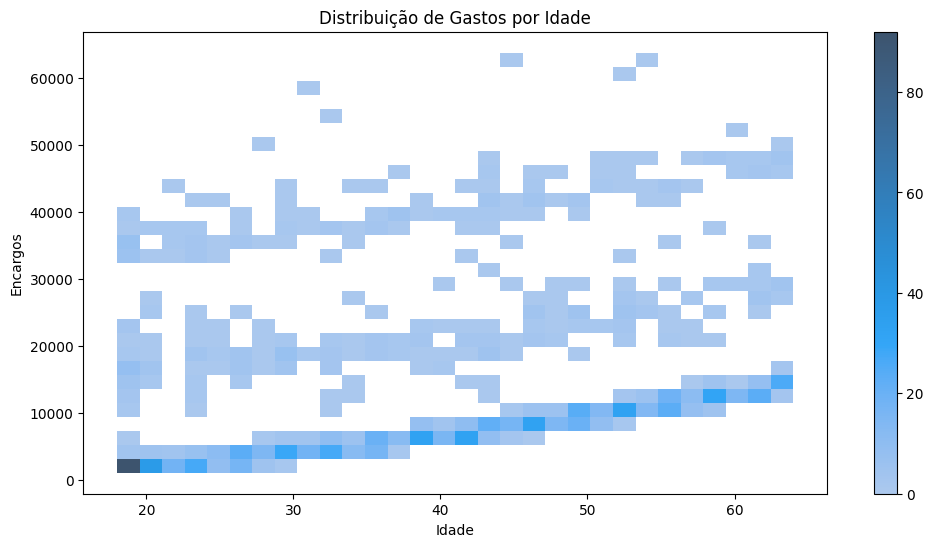

In [122]:
plt.figure(figsize=(12, 6))
sb.histplot(dados, x='idade', y='encargos', bins=30, cbar=True)
plt.title('Distribuição de Gastos por Idade')
plt.xlabel('Idade')
plt.ylabel('Encargos')

plt.show()

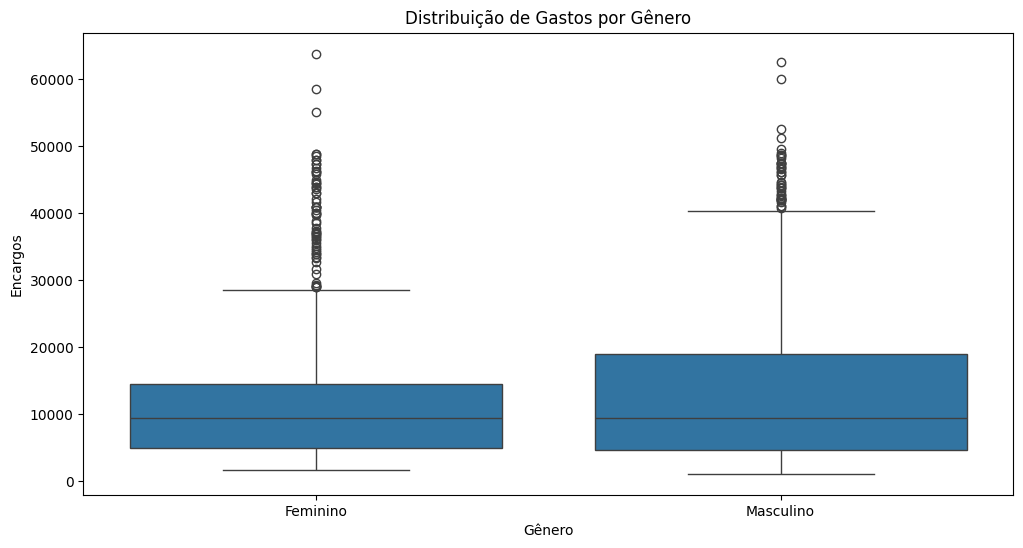

In [123]:
# Distribuição de gastos por gênero
plt.figure(figsize=(12, 6))
sb.boxplot(x='gênero', y='encargos', data=dados)
plt.title('Distribuição de Gastos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Encargos')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])

plt.show()

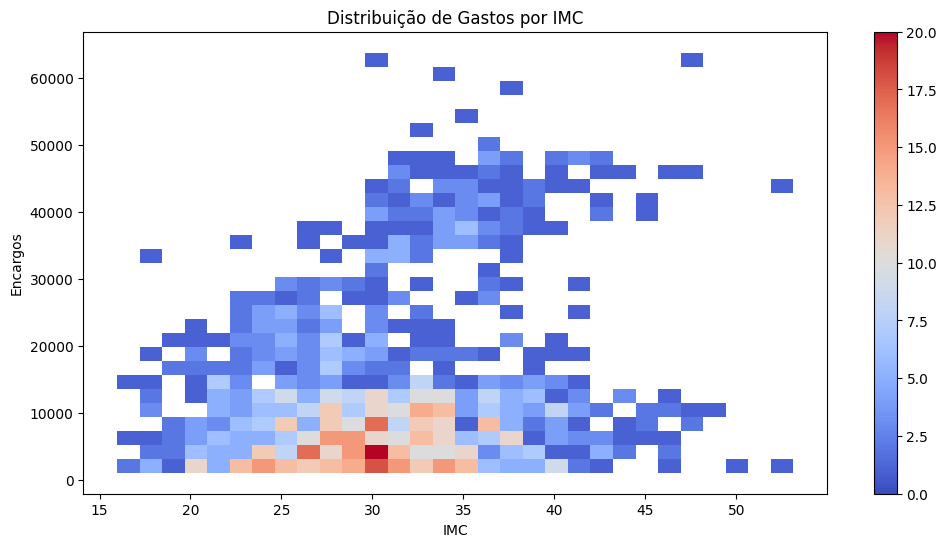

In [124]:
plt.figure(figsize=(12, 6))
sb.histplot(dados, x='imc', y='encargos', bins=30, cmap='coolwarm', cbar=True)
plt.title('Distribuição de Gastos por IMC')
plt.xlabel('IMC')
plt.ylabel('Encargos')

plt.show()

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

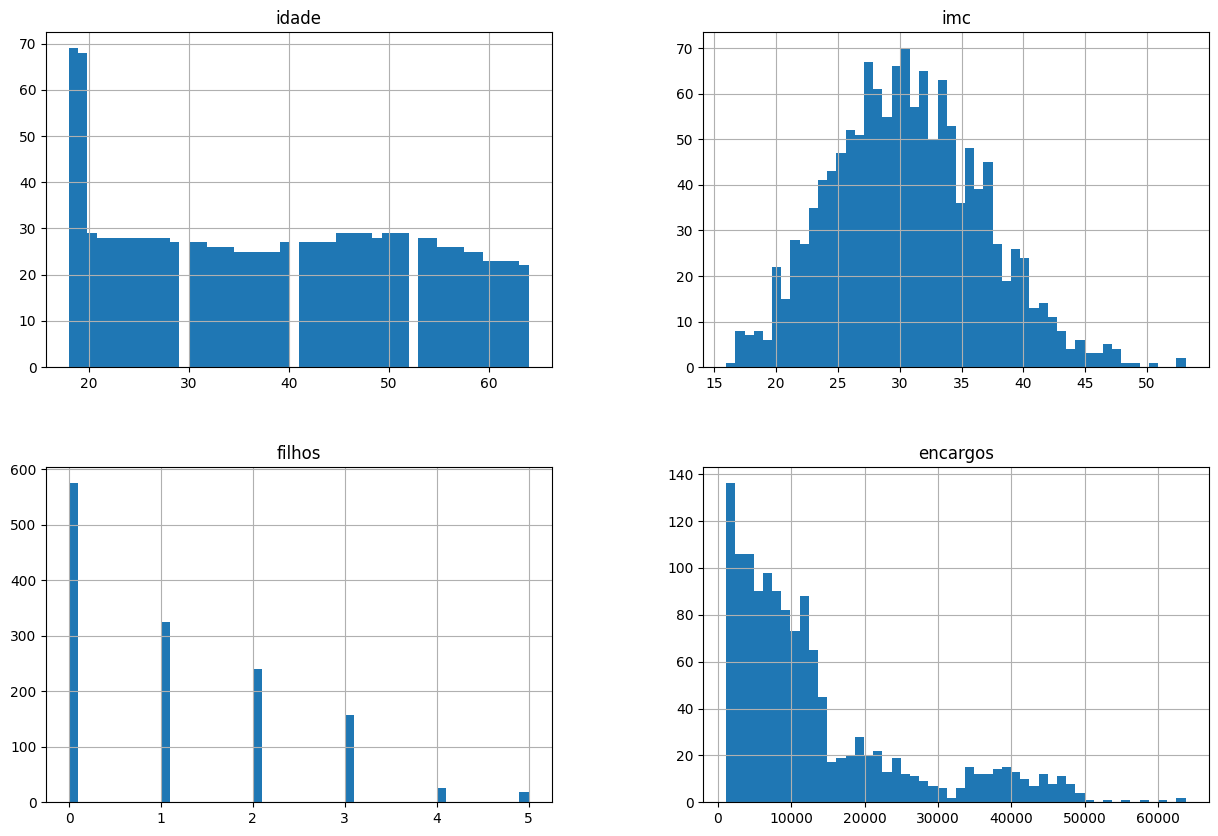

In [125]:
dados.hist(bins=50, figsize=(15,10))

<Axes: xlabel='encargos'>

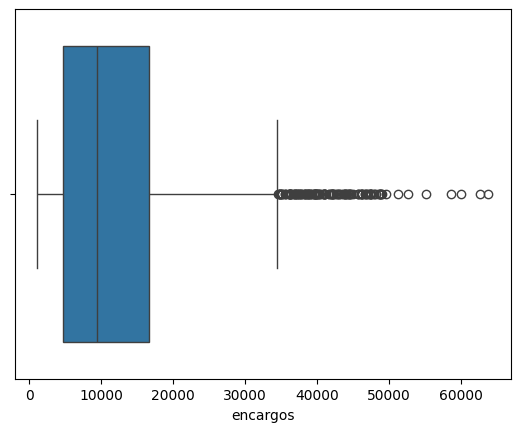

In [126]:
sb.boxplot(x=dados["encargos"])

---

# 2 - Pré-processamento de dados:
## (A) Realize   a   limpeza   dos   dados,   tratando   valores   ausentes (se necessário).

In [127]:
# Exemplo de tratamento de valores ausentes. Aula Regressão Linear Múltipla de Machine Learning e Aula 02 Machine Learning Avançado
# dados =  dados.ffill() #dados.fillna(method='ffill') Foi depreciado

dados.isnull().sum()

idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

## (B) Converta   variáveis   categóricas   em   formatos   adequados   para modelagem.

In [136]:
# Pré-processamento (exemplo)
from sklearn.calibration import LabelEncoder

# dados['fumante'] = dados['fumante'].map({'sim': 1, 'não': 0})
# dados = pd.get_dummies(dados, columns=['gênero', 'região'], drop_first=True)

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
dados['gênero'] = label_encoder.fit_transform(dados['gênero'])
dados['fumante'] = label_encoder.fit_transform(dados['fumante'])
dados['região'] = label_encoder.fit_transform(dados['região'])

dados.head(10)

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [147]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   gênero    1338 non-null   int64  
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   int64  
 5   região    1338 non-null   int64  
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [131]:
# Correlação entre os dados
corr = dados.corr()
corr

,idade,gênero,imc,filhos,fumante,região,encargos
idade,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
gênero,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
imc,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
filhos,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
fumante,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
região,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
encargos,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

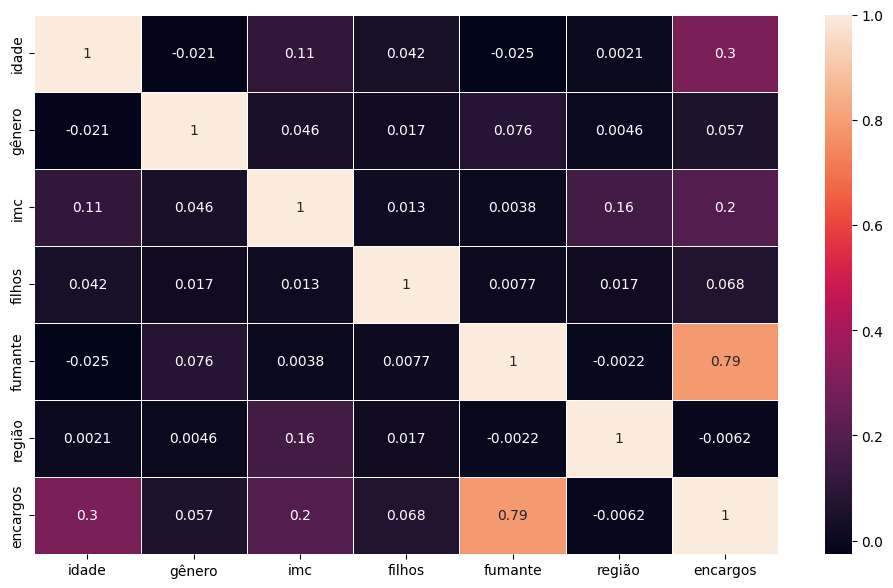

In [132]:
#Gráfico da correlação
ax, ya = plt.subplots(figsize=(12, 7))

sb.heatmap(corr, annot=True, linewidths=.5)

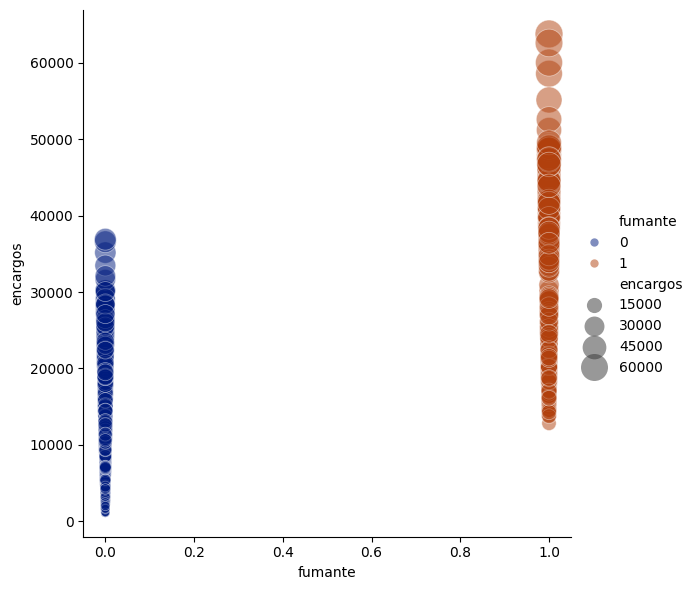

In [148]:
sb.relplot(x="fumante", y="encargos", hue="fumante", size="encargos",
            sizes=(40, 400), alpha=.5, palette="dark", height=6, data=dados)

## (C) Divida o conjunto de dados em conjuntos de treinamento e teste.

In [154]:
from sklearn.model_selection import train_test_split

#x = dados[['encargos']]
#y = dados['idade']
# Dado para usar no stratify, equilibrando as amostras. Usarei fumantes porque acredito que essa seja a melhor variável para medir os custos médicos, 
# aliado a idade e eventualmente gênero, já que algumas doenças afetam mais um gênero que outro.
#w = dados['fumante']

x = dados.drop(columns=['encargos'])
y = dados['encargos']

# train_test_split: Essa função divide arrays ou matrizes em subconjuntos de treinamento e teste de forma aleatória.
# x_train: É um DataFrame ou array que contém todas as colunas que serão usadas para prever a variável dependente.
# x_test: 
# y_train: 
# y_test:
# x:
# y test_size: 
# stratify: Direciona o equilibrio dos dados, equilibrando as amostras. Não sei bem se devo usar o stratfy, e se sim, se devo usar no gênero ou em fumante
# random_state: Distribui de forma aleatória os dados, uma vez que não sei se a base de dados está ordenada. Ex: Gênero masculino primeiro, ou da Idade maior para a menor.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [157]:
list(y_train)

[9193.8385,
 8534.6718,
 27117.99378,
 8596.8278,
 12475.3513,
 13405.3903,
 2150.469,
 13747.87235,
 6610.1097,
 39047.285,
 27375.90478,
 9048.0273,
 8988.15875,
 14901.5167,
 10096.97,
 8835.26495,
 38415.474,
 2721.3208,
 9877.6077,
 47269.854,
 4237.12655,
 2534.39375,
 2205.9808,
 10965.446,
 15006.57945,
 10736.87075,
 9788.8659,
 10422.91665,
 9304.7019,
 3378.91,
 2155.6815,
 38126.2465,
 35491.64,
 6356.2707,
 24059.68019,
 16450.8947,
 12925.886,
 36950.2567,
 2459.7201,
 46889.2612,
 5124.1887,
 14133.03775,
 6414.178,
 1720.3537,
 15817.9857,
 13462.52,
 2103.08,
 12105.32,
 20781.48892,
 12235.8392,
 41949.2441,
 12643.3778,
 21223.6758,
 7954.517,
 15170.069,
 3659.346,
 8232.6388,
 8027.968,
 13919.8229,
 10791.96,
 17878.90068,
 10601.412,
 13217.0945,
 11944.59435,
 14358.36437,
 32548.3405,
 5699.8375,
 2352.96845,
 4340.4409,
 9391.346,
 42211.1382,
 8823.279,
 14256.1928,
 7133.9025,
 5312.16985,
 3906.127,
 2203.47185,
 28340.18885,
 5484.4673,
 1622.1885,
 11299.

In [156]:
print("Conjunto de treinamento:")
print(x_train)
print(y_train)

print("\nConjunto de teste:")
print(x_test)
print(y_test)

print("Total base de treino: ", len(x_train))
print("Total base de teste: ", len(y_test))

Conjunto de treinamento:
      idade  gênero     imc  filhos  fumante  região
560      46       0  19.950       2        0       1
1285     47       0  24.320       0        0       0
1142     52       0  24.860       0        0       2
969      39       0  34.320       5        0       2
486      54       0  21.470       3        0       1
...     ...     ...     ...     ...      ...     ...
1095     18       0  31.350       4        0       0
1130     39       0  23.870       5        0       2
1294     58       1  25.175       0        0       0
860      37       0  47.600       2        1       3
1126     55       1  29.900       0        0       3

[1070 rows x 6 columns]
560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: encargos, Length: 1070, dtype: float64

Conjunto de teste:
      idade  gênero     imc  

## (D) Crie  um modelo  preditivo  de  regressão utilizando uma técnica à  sua escolha (por exemplo, Regressão Linear, Árvores de Decisão etc)

In [155]:
from sklearn.linear_model import LinearRegression

# Criando o modelo de Regressão Linear
model = LinearRegression()

---

# 3 - Treinamento e avaliação do modelo:
## (A) Treine o modelo com o conjunto de treinamento.



In [158]:
model.fit(x_train, y_train)

LinearRegression()

---

# 4 - Validação estatística:
## (A) Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Fazendo previsões no conjunto de teste
y_pred = model.predict(x_test)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [160]:

print(f'Mean Squared Error: {mse}')
print('MAE:', mae)
print(f'R^2 Score: {r2}')

Mean Squared Error: 33635210.431178406
MAE: 4186.508898366432
R^2 Score: 0.7833463107364539


----

# Relatório Estruturado

1. Introdução
Breve introdução sobre o objetivo do modelo e a importância de prever os encargos médicos individuais.

2. Análise dos Resultados
Distribuição dos Encargos

A distribuição dos encargos médicos mostra uma variação significativa, com valores que vão de aproximadamente 20.234 a 31.109. Isso sugere que os custos médicos podem ser bastante variados, possivelmente influenciados por fatores como idade, IMC, número de filhos, hábito de fumar e região.

Distribuição do IMC

A distribuição do IMC entre os indivíduos também varia, com valores entre 23 e 30. O IMC é um fator importante a ser considerado, pois pode estar correlacionado com os encargos médicos.

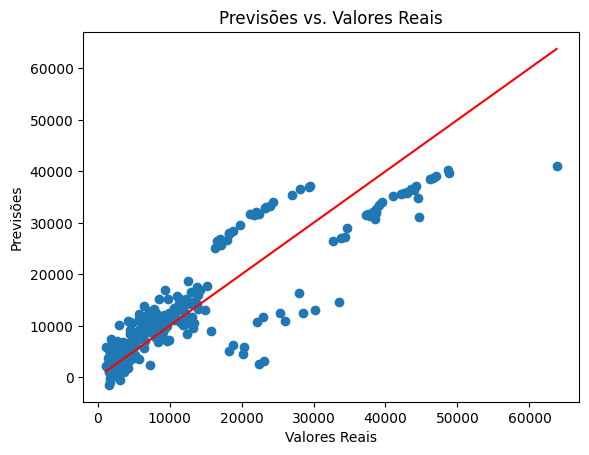

In [26]:
# Gráfico de previsões vs. valores reais
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Linha de referência
plt.show()

O gráfico de dispersão entre as previsões do modelo e os valores reais dos encargos médicos mostra a capacidade do modelo de aproximar os valores reais. No entanto, devido ao pequeno tamanho do conjunto de dados, é difícil avaliar a precisão do modelo de maneira robusta.

3. Validação Estatística
Para validar a eficácia do modelo, utilizamos as métricas de erro quadrático médio (MSE) e o coeficiente de determinação (R²).

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazendo previsões no conjunto de teste
y_pred = model.predict(x_test)

# Calculando métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 33635210.431178406
R^2 Score: 0.7833463107364539


Erro Quadrático Médio (MSE): O MSE é uma medida da média dos quadrados dos erros, ou seja, a diferença média entre os valores previstos e os valores reais. Um MSE menor indica um modelo mais preciso.

Coeficiente de Determinação (R²): O R² mede a proporção da variância nos dados dependentes que é previsível a partir das variáveis independentes. Um R² próximo de 1 indica um modelo que explica bem a variância dos dados.

4. Observações Finais
Tamanho do Conjunto de Dados: O conjunto de dados utilizado é extremamente pequeno (apenas 4 entradas). Em um cenário real, seria necessário um conjunto de dados muito maior para obter previsões confiáveis e uma validação estatística robusta.

Variáveis Importantes: As variáveis como idade, IMC, número de filhos, hábito de fumar e região são importantes para prever os encargos médicos. No entanto, outras variáveis adicionais poderiam melhorar a precisão do modelo.

Modelos Alternativos: Além da Regressão Linear, outros modelos como Árvores de Decisão, Random Forests ou até mesmo técnicas de Machine Learning mais avançadas poderiam ser explorados para melhorar a precisão das previsões.

5. Conclusão
O modelo desenvolvido fornece uma base inicial para a previsão dos encargos médicos individuais com base nas características fornecidas. No entanto, para obter previsões confiáveis e robustas, é essencial trabalhar com um conjunto de dados maior e explorar diferentes técnicas de modelagem. A análise visual e estatística apresentada aqui serve como um ponto de partida para futuras melhorias e refinamentos do modelo.

---

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Comprimento AB: 8
# Comprimento AT: 6
modelo_classificador.predict([[34000]])

c:\Users\kake\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([22], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predito = modelo_classificador.predict(x_test)

In [ ]:
accuracy_score(y_true = y_test, y_pred=y_predito)

0.2126865671641791

In [ ]:
dados_numericos = dados.select_dtypes(include=['number'])
dados_numericos.corr()

,idade,imc,filhos,fumante,encargos
idade,1.000000,0.109272,0.042469,-0.025019,0.299008
imc,0.109272,1.000000,0.012759,0.003750,0.198341
filhos,0.042469,0.012759,1.000000,0.007673,0.067998
fumante,-0.025019,0.003750,0.007673,1.000000,0.787251
encargos,0.299008,0.198341,0.067998,0.787251,1.000000
